In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import time
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
import numpy as np
import matplotlib.pyplot as plt 

Opening the browser

In [2]:
service=Service(executable_path='C:\webdrivers\chromedriver')
driver=webdriver.Chrome(service=service)
driver.get('https://www.instagram.com/')
driver.maximize_window()
wait=WebDriverWait(driver,10)

log in to instagram

In [3]:
def login(username,password):
    try:
        
        x=wait.until(EC.presence_of_element_located((By.NAME,'username')))
        
        #log in page
        txtbox=driver.find_element(By.NAME,'username')
        txtbox.send_keys(username)

        txtbox=driver.find_element(By.NAME,'password')
        txtbox.send_keys(password)

        driver.find_element(By.CLASS_NAME,'_acan._acap._acas._aj1-').submit()
        
        #save your info: No
        pop_up=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_ac8f')))
        pop_up.click()

        
        #Turn on Notification: No
        pop_up=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9--._a9_1')))
        pop_up.click()
    except TimeoutException:
        print('Oops, Time out')

In [4]:
username='debayan.biswas.79'
password='8902279117Debayan'
login(username,password)

 ## 1.1) $\text{From the list of instagram handles you obtained when you searched ‘food’ in previous project.}$ $\text{ Open the first 10 handles and find the top 5 which have the highest number of followers}$

In [6]:
def get_handles():
    try:
        # waiting and finding search bar
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aacl._aacp._aacu._aacx._aada')))
        driver.find_element(By.CLASS_NAME,'_aacl._aacp._aacu._aacx._aada').click()
        
        # waiting and typing 'food' in search bar
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aauy')))
        driver.find_element(By.CLASS_NAME,'_aauy').send_keys('food')

        #give time to load all handles
        
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_abm4')))
        time.sleep(5)
        #printing the handles
        
        li=[]
        for i in driver.find_elements(By.CLASS_NAME,'_abm4'):
            if len(i.text)==0 or i.text.split('\n')[0][0]=='#':
                continue
            
            #print(i.text.split('\n')[0])
            li.append(i.text.split('\n')[0])
            if len(li)==10:
                break
            
        #closing the search bar
        
        driver.find_element(By.CLASS_NAME,'_ab6-').click()
        return li
    except TimeoutException:
        print('Time limit exceeded')

In [7]:
#getting the handles 
handles=get_handles()


In [8]:
# Run this cell to get the followers of extracted handles
followers=[]
for i in handles:
    #opening the handle
    driver.get(f'https://www.instagram.com/{i}/')
    
    #Waiting for the followers element
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_ac2a')))
    time.sleep(3)
    bttn=driver.find_elements(By.CLASS_NAME,'_ac2a')
    
    #appending the number of followers in followers list
    txt=bttn[1].text
    
    if txt[-1]=='K':
        followers.append(float(txt[:-1])*1000)
    elif ',' in txt:
        li=txt.split(',')
        s=''
        for i in li:
            s=s+i
        
        followers.append(float(s))
    else:
        followers.append(float(txt))
        
    
driver.get(f'https://www.instagram.com/{username}/')

In [10]:
followers=np.array(followers,dtype='float')
handles=np.array(handles)

#sort the handles according to the number of followers
handles=handles[followers.argsort()]
followers=np.sort(followers)

#filter out the top 5 
handles=handles[-1:-6:-1]
followers=followers[-1:-6:-1]
print('Top 5 which have the highest number of followers:')
print()
for i in range(5):
    print(handles[i],': ',followers[i])


Top 5 which have the highest number of followers:

foodtalkindia :  309000.0
food :  182000.0
foodzpah :  145000.0
food_fflavourss :  39300.0
my_food_lane :  24900.0


## 1.2) $\text{Now Find the number of posts these handles have done in the previous 3 days.
}$

In [55]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    driver.refresh()
    driver.refresh()
    time.sleep(6)
    try :
        #locating first post
    
        try:
            post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
            post.click()
            
        # if there is no posts at all 
         
        except TimeoutException:
            return 0
              
        count = 0 
        
        while True :
            #getting date of the the post
            time.sleep(4)
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            months=['J','F','M','A','S','O','N','D']
            li=temp.text.split()
            # if it is like 2 hours ago or something like that
            if (li[1]=='minutes') or (li[1]=='hours') or (li[1]=='minute') or (li[1]=='hour'):
                count=count+1
                next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
                next_but.click()
                
                continue
            # if it is like 2 hours ago or something like that
            if (li[1]=='MINUTES') or (li[1]=='HOURS') or (li[1]=='MINUTE') or (li[1]=='HOUR'):
                
                count=count+1
                next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
                next_but.click()
                
                
                continue
            #if it is January 23 or something like that
            if (temp.text[0] in months):
                break
            
            val=int(temp.text.split()[0])
            # if it is 1 days ago or 2 days ago or something like that
            if val>day:
                break
            else:
                count=count+1
            
            #locating next button
            
            next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
            next_but.click()
            
        #locating the close button
        time.sleep(2)
        name='x78zum5.x6s0dn4.xl56j7k.xdt5ytf'
        close=wait.until(EC.presence_of_element_located((By.CLASS_NAME,name)))
        
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
    

array(['foodtalkindia', 'food', 'food_fflavourss', 'food_of_kolkata',
       'my_food_lane'], dtype='<U17')

In [56]:
counts=[]
for i in handles:
    time.sleep(2)
    driver.get(f'https://www.instagram.com/{i}/')
    counts.append(count_of_post(3))
    
    

#     counts.append()
# times.sleep(2)
# driver.get(f'https://www.instagram.com/{username}/')

## 1.3 $\text{Depict this information using a suitable graph.}$

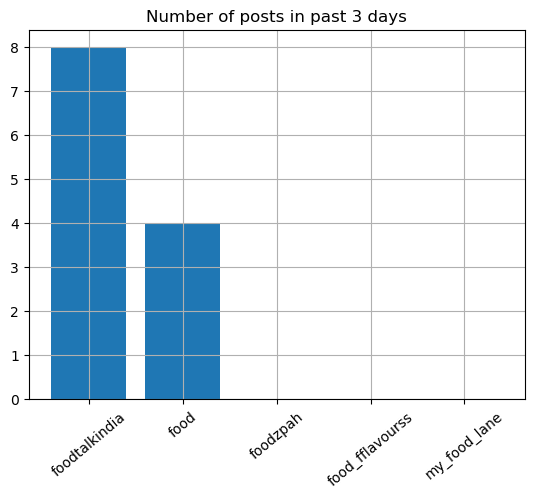

In [57]:
plt.bar(handles,counts)
plt.title('Number of posts in past 3 days')
plt.grid()
plt.xticks(rotation=40)
plt.show()

In [58]:
print(counts)

[8, 4, 0, 0, 0]


'x1i10hfl.xjbqb8w.x6umtig.x1b1mbwd.xaqea5y.xav7gou.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz._aa9__a6hd'

In [16]:
def contents_of_post():
    name='x1i10hfl.xjbqb8w.x6umtig.x1b1mbwd.xaqea5y.xav7gou.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz._aa9__a6hd'

    try :
        li=[]
        #locating first post
    
        try:
            post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
            time.sleep(3)
            post.click()
            
        # if there is no posts at all 
         
        except TimeoutException:
            return 0
              
        count = 0 
        
        while True :
            #getting date of the the post
            time.sleep(4)
            
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,name)))
            elements=driver.find_elements(By.CLASS_NAME,name)
            time.sleep(2)
            
            for i in elements:
                li.append(i.text)
            
            
            #locating next button
            
            next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
            next_but.click()
            
        #locating the close button
        time.sleep(2)
        name='x78zum5.x6s0dn4.xl56j7k.xdt5ytf'
        close=wait.until(EC.presence_of_element_located((By.CLASS_NAME,name)))
        
        close.click()
        return li
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
    

In [18]:
contents=[]
for i in handles:
    time.sleep(2)
    driver.get(f'https://www.instagram.com/{i}/')
    contents.append(contents_of_post())
    break
   

Something went wrong! Try Again
